In [28]:
import pandas as pd

df = pd.read_csv("global_sales.csv")
df


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,51100,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,75508,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NaN,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,28034,Spain,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,NaN,90110,Finland,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,28034,Spain,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,Toulouse,NaN,31000,France,Small


In [30]:
#check data distribution 
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [31]:
#Check missing values
print(df.isnull().sum())


#Check duplicates 
print("Duplicates:", df.duplicated().sum())

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
CITY                  0
STATE              1486
POSTALCODE           76
COUNTRY               0
DEALSIZE              0
dtype: int64
Duplicates: 0


Since we found that State and PostalCode has missing values, replace missing values on State with unknown and missing values on Postalcode to 00000

In [4]:
df['STATE'] = df['STATE'].fillna('Unknown')

df['POSTALCODE'] = df['POSTALCODE'].fillna('00000')


print(df[['STATE','POSTALCODE']].isnull().sum())


STATE         0
POSTALCODE    0
dtype: int64


In [ ]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M')

#Check data types for confirmation 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   QTR_ID           2823 non-null   int64         
 8   MONTH_ID         2823 non-null   int64         
 9   YEAR_ID          2823 non-null   int64         
 10  PRODUCTLINE      2823 non-null   object        
 11  MSRP             2823 non-null   int64         
 12  PRODUCTCODE      2823 non-null   object        
 13  CUSTOMERNAME     2823 non-null   object        
 14  CITY             2823 non-null   object 

After gone through the dataset, i came across with these questions to investigate
1. Whats the top5 productline for the global sales?
2. Analyse Global Sales by Year, then breakdown to Quarter and Days of Week to discover potential trend.
3. Analyse which Country has the highest sales, then which City has the highest sales 
4. Monthly Sales Breakdown for top5 product line 
5. Spending Power for Top Selling Countries, whats the spending price range. 

Generate YearMonth and Weekday for further breakdown analysis

In [ ]:

# YearMonth for analysis
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M')

# Day for analysis
df['Weekday'] = df['ORDERDATE'].dt.day_name()

df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,POSTALCODE,COUNTRY,DEALSIZE,YearMonth,Weekday
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,NY,10022,USA,Small,2003-02,Monday
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,NaN,51100,France,Small,2003-05,Wednesday
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,NaN,75508,France,Medium,2003-07,Tuesday
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,90003,USA,Medium,2003-08,Monday
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,NaN,USA,Medium,2003-10,Friday


In [40]:
yearly_sales = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
yearly_sales

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


In [43]:
monthly_sales = df.groupby("YearMonth")["SALES"].sum().reset_index()
monthly_sales.head()



,YearMonth,SALES
0,2003-01,129753.60
1,2003-02,140836.19
2,2003-03,174504.90
3,2003-04,201609.55
4,2003-05,192673.11


In [ ]:
# Group by Weekday
weekday_sales = df.groupby("Weekday")["SALES"].sum().reset_index()
weekday_sales.head()


,Weekday,SALES
0,Friday,2140653.80
1,Monday,1254535.03
2,Saturday,420326.93
3,Sunday,421781.56
4,Thursday,1947412.20


In [37]:
top5_products = (
    df.groupby("PRODUCTLINE")["SALES"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)
top5_products


,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Vintage Cars,1903150.84
2,Motorcycles,1166388.34
3,Trucks and Buses,1127789.84
4,Planes,975003.57


In [ ]:
# Pivot table
# rows=YearMonth, cols=ProductLine, values=SALES
monthly_pivot = (
    df.groupby(["YearMonth", "PRODUCTLINE"])["SALES"]
      .sum()
      .unstack(fill_value=0)
)
monthly_pivot.tail()


PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
YearMonth,,,,,,,
2005-01,139087.23,39913.36,11262.27,31807.85,6510.17,36577.20,74385.34
2005-02,146148.57,47951.42,31040.41,10586.06,7209.84,37174.16,78075.72
2005-03,91389.86,47830.83,79735.05,52765.15,12939.45,14579.38,75023.04
2005-04,111562.51,59862.22,43763.59,6284.00,0.00,0.00,40160.97
2005-05,184385.11,39389.70,34272.85,26735.01,10257.87,89726.28,73094.24


In [39]:
country_sales = df.groupby("COUNTRY")["SALES"]\
                  .sum()\
                  .sort_values(ascending=False)\
                  .reset_index()
country_sales.head(10)


,COUNTRY,SALES
0,USA,3627982.83
1,Spain,1215686.92
2,France,1110916.52
3,Australia,630623.10
4,UK,478880.46
5,Italy,374674.31
6,Finland,329581.91
7,Norway,307463.70
8,Singapore,288488.41
9,Denmark,245637.15


After did some feature engineering and data exploration, let's dive in to visulisation to discover meaningful insights. 

Visualisation 

Now we are discovering Yearly Total Sales 

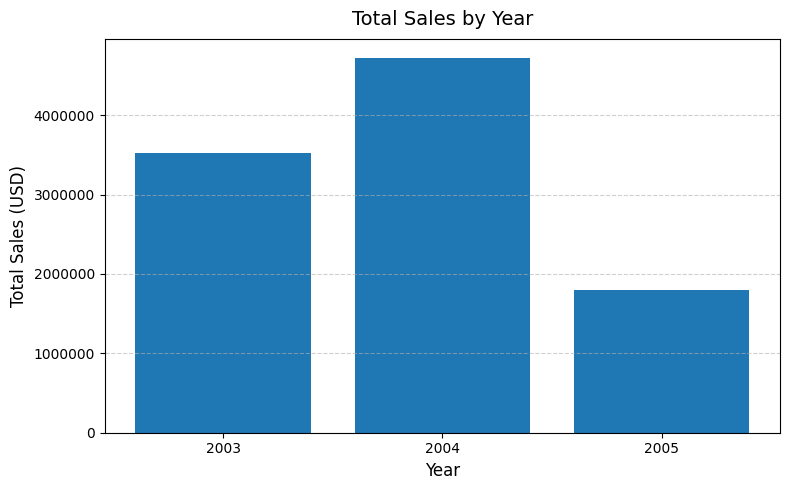

In [49]:
import matplotlib.pyplot as plt
# Plotting total sales by year

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(
    yearly_sales['YEAR_ID'].astype(str),
    yearly_sales['SALES'],
    color='tab:blue'
)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Total Sales by Year', fontsize=14, pad=10)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Sales (USD)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

2004 shows the highest total Sales among the 3 years, but 2005 has the lowest one. Let's breakdown into quarter to see the sales trend difference. 

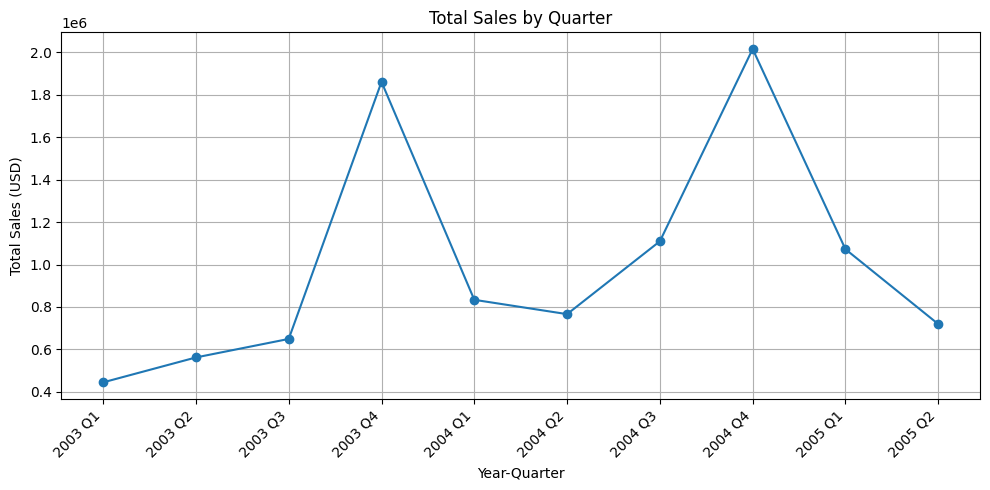

In [ ]:
# Group by year & quarter
quarterly = (
    df
    .groupby(['YEAR_ID', 'QTR_ID'])['SALES']
    .sum()
    .reset_index()
)

# Create Quarter label
quarterly['YearQuarter'] = (
    quarterly['YEAR_ID'].astype(str)
    + ' Q'
    + quarterly['QTR_ID'].astype(str)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    quarterly['YearQuarter'],
    quarterly['SALES'],
    marker='o',
    linestyle='-'
)
plt.xticks(rotation=45, ha='right')
plt.title("Total Sales by Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


We can see that the line chart makes it clear that 2004 was the peak, and that 2005 drop is simply because the year isn’t complete.

Let's breakdown into Weekdays to discover potential peak days. 

C:\Users\USER\AppData\Local\Temp\ipykernel_35672\3425290806.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sales = df.groupby('Weekday')['SALES'].sum().reset_index()


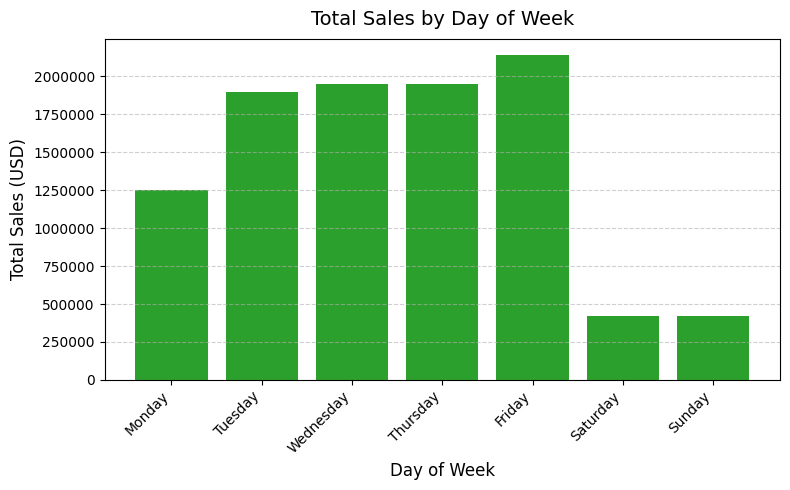

In [56]:
# Extract weekday as a categorical with fix order
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Weekday'] = pd.Categorical(
    df['ORDERDATE'].dt.day_name(),
    categories=weekday_order,
    ordered=True
)

# Aggregate sales by weekday
weekday_sales = df.groupby('Weekday')['SALES'].sum().reset_index()


#plot 
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(weekday_sales['Weekday'], weekday_sales['SALES'], color='tab:green')


ax.ticklabel_format(style='plain', axis='y')


ax.set_title('Total Sales by Day of Week', fontsize=14, pad=10)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Total Sales (USD)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Result shows that Friday has the highest sales from their global sales. 

Let's discover on the Top Product Line (sorted by Top Revenue)

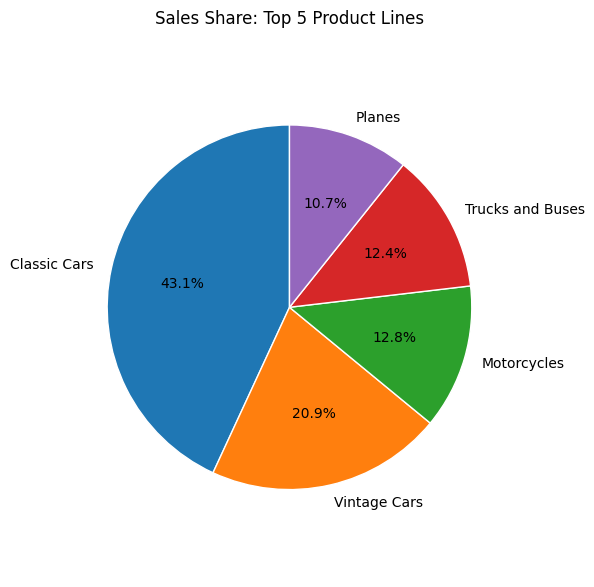

In [68]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    top5_products['SALES'],
    labels=top5_products['PRODUCTLINE'],
    autopct='%.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
ax.set_title('Sales Share: Top 5 Product Lines', pad=10)
ax.axis('equal')  # ensure the pie is drawn as a circle

plt.tight_layout()
plt.show()

Let's discover their quarter sales for Top5 product line.

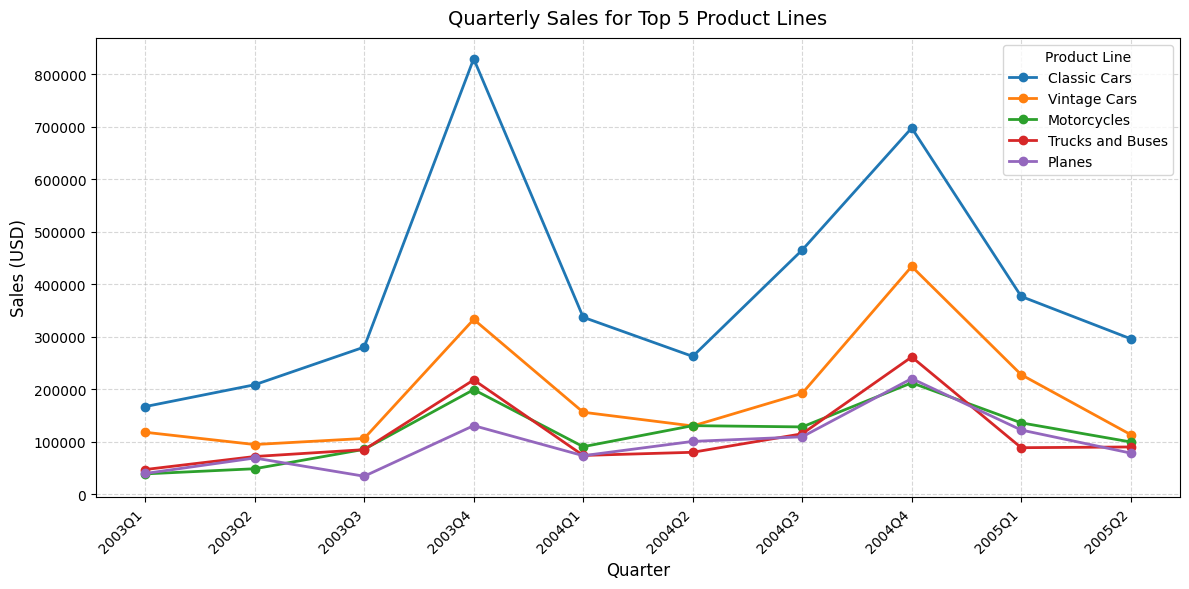

In [63]:
# Use the PRODUCTLINE column directly
top5 = top5_products['PRODUCTLINE'].tolist()

# 3. Prepare monthly sales for those top 5
df['Quarter'] = df['ORDERDATE'].dt.to_period('Q').astype(str)
monthly = (
    df[df['PRODUCTLINE'].isin(top5)]
      .groupby(['Quarter', 'PRODUCTLINE'])['SALES']
      .sum()
      .reset_index()
)

# 4. Pivot to wide format
pivot = monthly.pivot(index='Quarter', columns='PRODUCTLINE', values='SALES')

# 5. Plot multi-line chart
fig, ax = plt.subplots(figsize=(12, 6))
for product in top5:
    ax.plot(
        pivot.index,
        pivot[product],
        marker='o',
        linewidth=2,
        label=product
    )

# 6. Formatting
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
ax.set_title('Quarterly Sales for Top 5 Product Lines', fontsize=14, pad=10)
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Sales (USD)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title='Product Line')

plt.tight_layout()
plt.show()

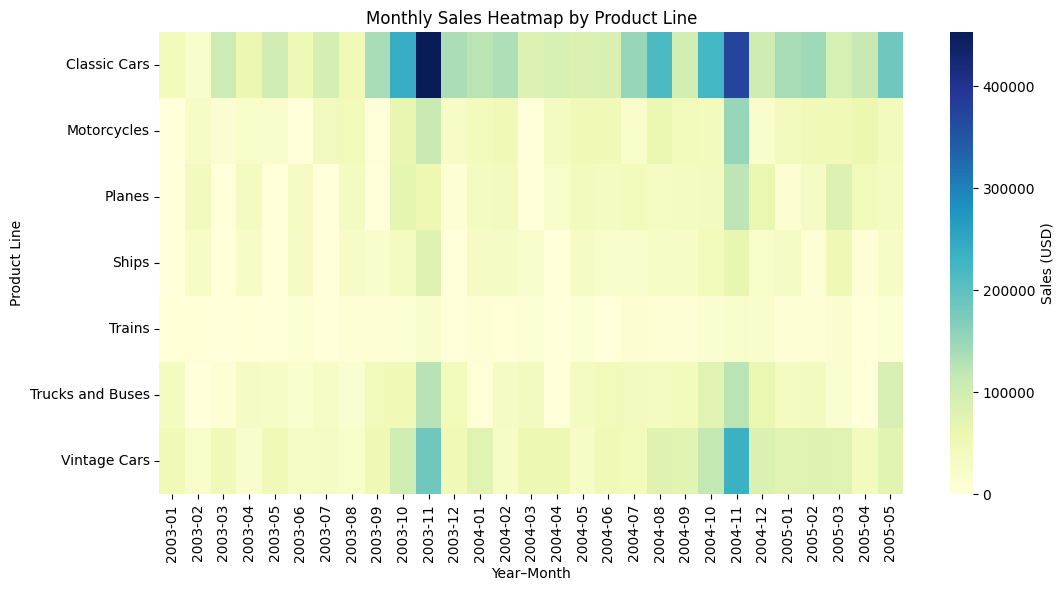

In [64]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(monthly_pivot.T, 
            cmap="YlGnBu", 
            cbar_kws={'label':'Sales (USD)'})
plt.title("Monthly Sales Heatmap by Product Line")
plt.xlabel("Year–Month")
plt.ylabel("Product Line")
plt.show()


As what we observed from the above line graph and heatmap, showing that Q4 has the highest sales from the top5 product line, mainly falls on November. 

Top Countries by Total Sales

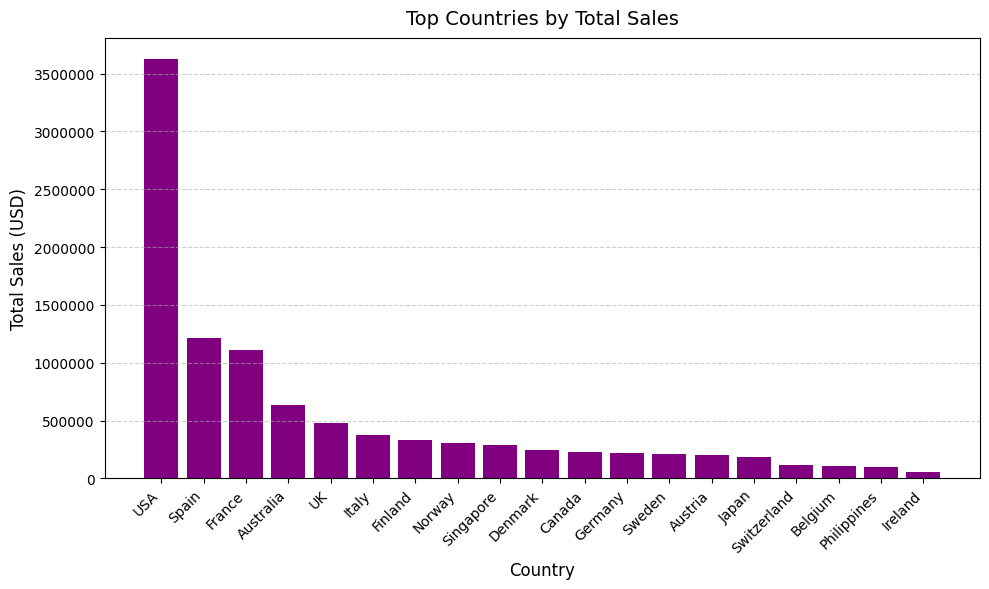

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(country_sales['COUNTRY'], country_sales['SALES'], color='purple')
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Top Countries by Total Sales', fontsize=14, pad=10)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Let's dive in see which city has the highest sales from the top country sales

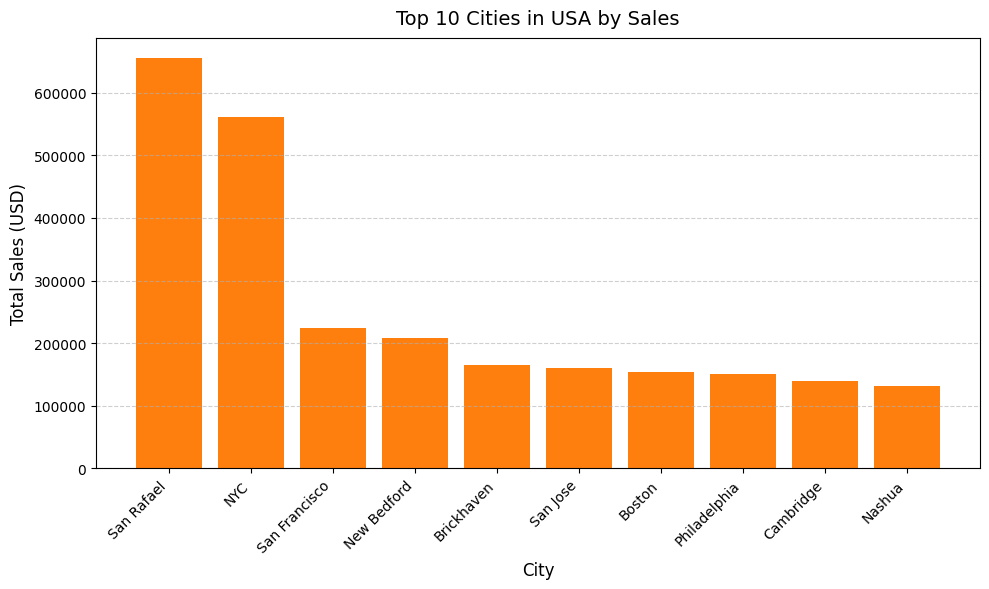

In [ ]:
# Drill into top country for cities
top_country = country_sales.loc[0, 'COUNTRY']
city_sales = (
    df[df['COUNTRY'] == top_country]
      .groupby('CITY')['SALES']
      .sum()
      .nlargest(10)
      .reset_index()
)

# plot city sales
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(city_sales['CITY'], city_sales['SALES'], color='tab:orange')
ax.ticklabel_format(style='plain', axis='y')
ax.set_title(f'Top 10 Cities in {top_country} by Sales', fontsize=14, pad=10)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Spending Power
- Let's use boxplot to discover the customers' spending power from the top 10 countries 

C:\Users\USER\AppData\Local\Temp\ipykernel_35672\2990977052.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=top10_countries, patch_artist=True)


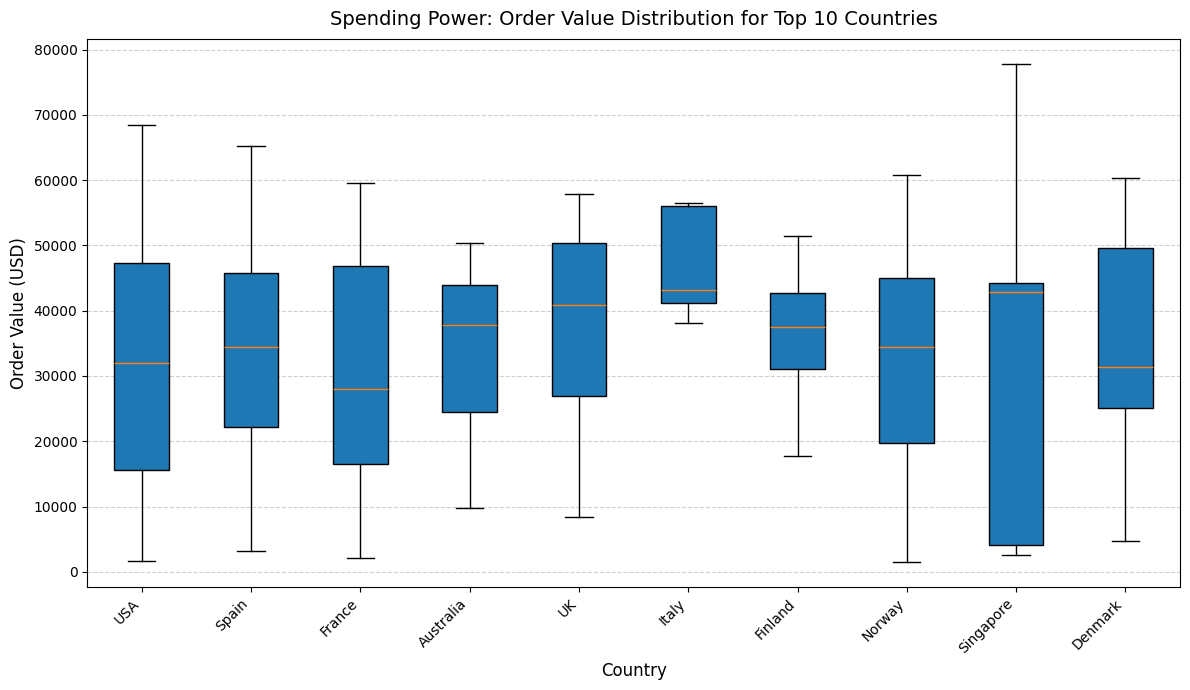

In [72]:
top10_countries = (
    df.groupby('COUNTRY')['SALES']
      .sum()
      .nlargest(10)
      .index
      .tolist()
)

# Compute order value for those top 10 countries
order_values = (
    df[df['COUNTRY'].isin(top10_countries)]
      .groupby(['COUNTRY', 'ORDERNUMBER'])['SALES']
      .sum()
      .reset_index()
)

# Do data for boxplot, as list of order values for each country
data = [
    order_values.loc[order_values['COUNTRY'] == country, 'SALES']
    for country in top10_countries
]

# Plot order value distribution
fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(data, labels=top10_countries, patch_artist=True)

ax.set_title('Spending Power: Order Value Distribution for Top 10 Countries', fontsize=14, pad=10)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Order Value (USD)', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Italy and Denmark post the highest median order values (both above median $40k ), indicating consistently large purchases.

Singapore exhibits the greatest variability, its IQR is the widest andreach nearly $80k, highlighting occasional high value orders.

## Key Takeaways

1. **Top Product Lines:**  
   - Classic Cars and Vintage Cars together account for over 60% of total revenue.

2. **Annual & Quarterly Trends:**  
   - 2004 was the peak year, with a sharp drop in 2005 simply because our data only covers Jan–May.  
   - Quarterly breakdown shows Q2 2005 at roughly 1 M USD vs 2–3 M in prior years’ Q2s.

3. **Weekday Patterns:**  
   - Highest sales on Fridays; weekends (Sat/Sun) lag by around 75% vs. weekdays.

4. **Geography:**  
   - The U.S. is the dominant market (3.6 M USD), followed by Spain and France (1.2 M and 1.1 M).  
   - Within the U.S., San Rafael and NYC lead city‐level sales.

5. **Spending Power:**  
   - Italy and Denmark post the highest median order values (both above median $40k ), indicating consistently large purchases.
   - Singapore ehas the widest IQR, highlighting occasional high value orders.

